In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

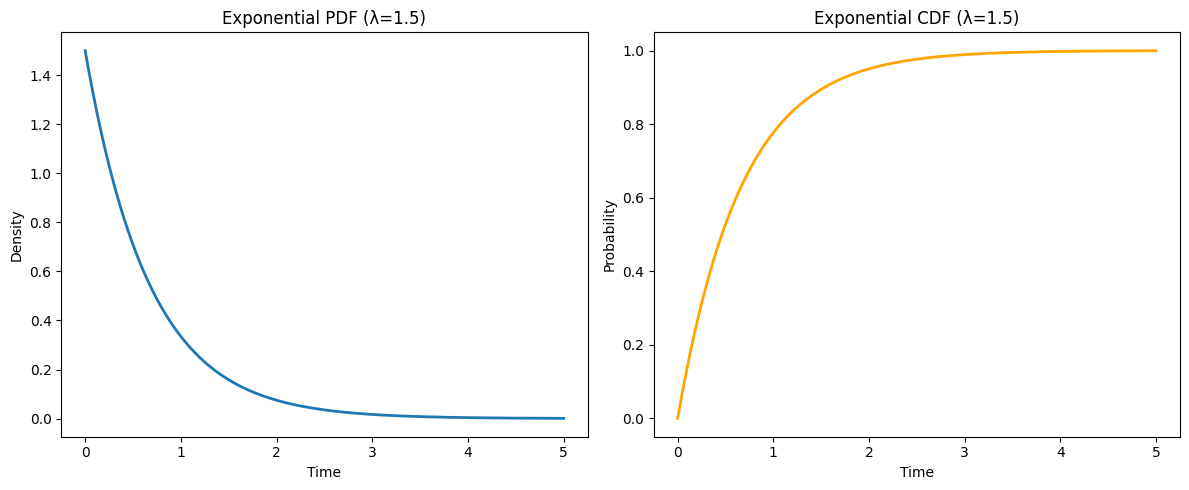

In [10]:
x = np.linspace(0, 5, 1000)
lambda_param = 1.5

pdf = lambda_param * np.exp(-lambda_param * x)
cdf = 1 - np.exp(-lambda_param * x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, linewidth=2)
plt.title(f'Exponential PDF (λ={lambda_param})')
plt.xlabel('Time')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.plot(x, cdf, linewidth=2, color='orange')
plt.title(f'Exponential CDF (λ={lambda_param})')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

In [11]:
# P(X > s + t | X > s) = P(X > t)
# "Given that we've waited s time units, the probability of waiting 
# t more units is the same as waiting t units from the start"

lambda_param = 1.0
s = 2.0  # already waited
t = 1.0  # additional time

# P(X > s + t) / P(X > s)
conditional_prob = np.exp(-lambda_param * (s + t)) / np.exp(-lambda_param * s)

# P(X > t)
unconditional_prob = np.exp(-lambda_param * t)

print(f"P(X > {s+t} | X > {s}) = {conditional_prob:.6f}")
print(f"P(X > {t}) = {unconditional_prob:.6f}")
print(f"Equal? {np.isclose(conditional_prob, unconditional_prob)}")

P(X > 3.0 | X > 2.0) = 0.367879
P(X > 1.0) = 0.367879
Equal? True


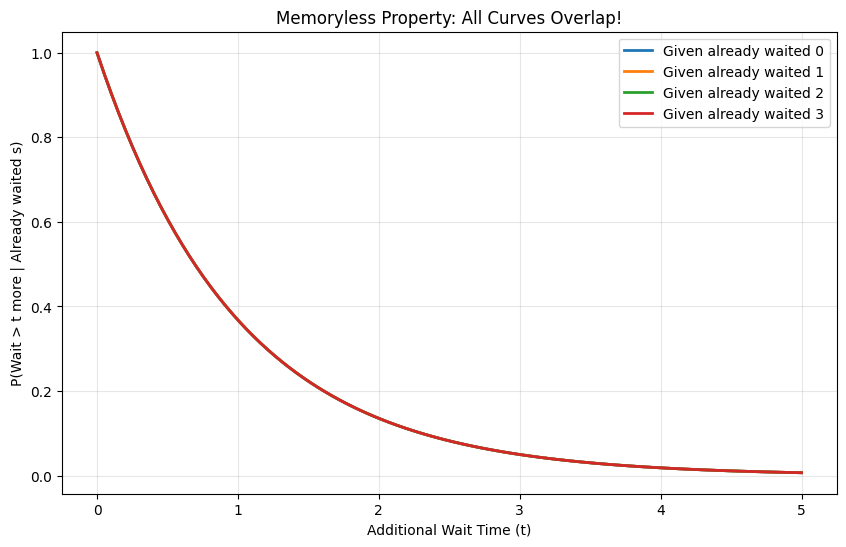

In [12]:
lambda_param = 1.0
t_values = np.linspace(0, 5, 100)
s_values = [0, 1, 2, 3]

plt.figure(figsize=(10, 6))

for s in s_values:
    # P(X > s + t | X > s) for varying t
    survival = np.exp(-lambda_param * t_values)
    plt.plot(t_values, survival, linewidth=2, label=f'Given already waited {s}')

plt.xlabel('Additional Wait Time (t)')
plt.ylabel('P(Wait > t more | Already waited s)')
plt.title('Memoryless Property: All Curves Overlap!')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Conclusion

The memoryless property of the exponential distribution means that the probability of an event occurring in the next t time units is completely independent of how long we've already been waiting. Mathematically: P(X > s + t | X > s) = P(X > t) for all s, t ≥ 0.

This "forgetting" property makes the exponential distribution unique among continuous distributions and explains why it's the natural choice for modeling random, time-independent events like radioactive decay, customer arrivals, or system failures. The past provides no information about the future—the system has no memory of how long it has already been running.

In practical terms: if a lightbulb has been working for 100 hours, its probability of lasting another 50 hours is exactly the same as a brand new lightbulb lasting 50 hours. This seems counterintuitive for physical objects (which do age), but perfectly models truly random processes where each moment is independent of the past.